# Preparing data as Images

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
import torch
import os
from pathlib import Path
os.chdir(Path(os.path.abspath("/home/monty/Desktop/DL Project/DeepLearning_group_2/mros-data-main/mros_data")))
from mros_data.datamodule import SleepEventDataModule
from mros_data.datamodule.transforms import STFTTransform
from matplotlib import patches
import json

Using this method to convert spectograms into Images

In [9]:
def spectogram_to_image(spectrogram):
    tensor= torch.tensor(spectrogram)*255
    tensor = np.array(tensor, dtype=np.uint8)
    return Image.fromarray(tensor)

and using this method we make folder with eval and train set of images

In [10]:
def SaveImagesToFolder(dm):
    train_ds = dm.train
    eval_ds = dm.eval
    len_train = len(train_ds)
    len_eval = len(eval_ds)

    img_path = "/home/monty/Desktop/DL Project/DeepLearning_group_2/coco"

    if os.path.isdir(img_path) == False:
        os.mkdir(img_path)
        os.mkdir(f"{img_path}/train")
        os.mkdir(f"{img_path}/eval")
        os.mkdir(f"{img_path}/annotations")

    for x in range(len_train):
        spectrogram = train_ds.get_2Dmatrix(x, channel_idx=0, window_size=int(4.0 * train_ds.fs),
                                            step_size=int(0.125 * train_ds.fs), nfft=1024)
        img = spectogram_to_image(spectrogram)

        img_name = f"train_{x}.png"
        image = img.save(f"{img_path}/train/{img_name}")

    for x in range(len_eval):
        spectrogram = eval_ds.get_2Dmatrix(x, channel_idx=0, window_size=int(4.0 * train_ds.fs),
                                            step_size=int(0.125 * train_ds.fs), nfft=1024)
        img = spectogram_to_image(spectrogram)

        img_name = f"eval_{x}.png"
        image = img.save(f"{img_path}/eval/{img_name}")

Preparing dataset

In [11]:
params = dict(
    data_dir="/home/monty/Desktop/DL Project/DeepLearning_group_2/lm/",
    batch_size=16,
    n_eval=2,
    n_test=2,
    num_workers=0,
    seed=1337,
    events={"lm": "Leg movement"},
    window_duration=600,  # seconds
    cache_data=True,
    default_event_window_duration=[15],
    event_buffer_duration=3,
    factor_overlap=2,
    fs=64,
    matching_overlap=0.5,
    n_jobs=-1,
    n_records=10,
    picks=["legl", "legr"],
    # transform=MultitaperTransform(128, 0.5, 35.0, tw=8.0, normalize=True),
    transform=STFTTransform(
        fs=64, segment_size=int(4.0 * 64), step_size=int(0.125 * 64), nfft=1024, normalize=True
    ),
    scaling="robust",
)
dm = SleepEventDataModule(**params)

In [12]:
dm.setup('fit')
train_ds = dm.train
eval_ds = dm.eval

Using cache for data prep: /home/monty/Desktop/DL Project/DeepLearning_group_2/mros-data-main/mros_data/data/.cache


100%|██████████| 6/6 [00:00<00:00, 49.07it/s]


Using cache for data prep: /home/monty/Desktop/DL Project/DeepLearning_group_2/mros-data-main/mros_data/data/.cache


100%|██████████| 2/2 [00:00<00:00, 1584.85it/s]


Converting a 2D matrix to image

<PIL.Image.Image image mode=L size=4801x513 at 0x7F11590F0D60>


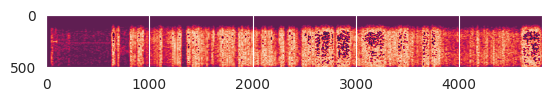

In [6]:
spectrogram = train_ds.get_2Dmatrix(0, channel_idx=0, window_size=int(4.0 * train_ds.fs), step_size=int(0.125 * train_ds.fs), nfft=1024)
IMG = spectogram_to_image(spectrogram)
print(IMG)
imgplot = plt.imshow(IMG)

Now creating the image folders and files

In [7]:
#SaveImagesToFolder(dm)

Exploring the data

In [8]:
batch = train_ds[0]
print(type(batch))
print(batch.keys())

<class 'dict'>
dict_keys(['signal', 'events', 'stages', 'record', 'localizations_target', 'classifications_target'])


In [9]:
record = batch['record']
print(type(record))
print(record)

<class 'str'>
mros-visit1-aa0005


In [10]:
signal = batch['signal']
print(type(signal))

<class 'numpy.ndarray'>


In [11]:
events = batch['events']
_events = np.delete(events, 2, 1)*4801
_events


array([[ 640.8835 ,  651.2606 ],
       [ 641.75867,  665.7637 ],
       [ 693.7695 ,  704.14667],
       [ 819.42065,  828.1725 ],
       [ 896.18665,  911.4398 ],
       [1100.9792 , 1119.3582 ],
       [1190.623  , 1197.8745 ],
       [1224.255  , 1230.6313 ],
       [1276.2659 , 1305.897  ],
       [1288.2684 , 1306.6471 ],
       [1365.9095 , 1390.6647 ],
       [1369.0352 , 1380.2875 ],
       [1799.6249 , 1825.2552 ],
       [1871.6399 , 1902.8964 ],
       [2153.1985 , 2172.4524 ],
       [2259.7207 , 2290.9773 ],
       [2346.8638 , 2378.8704 ],
       [2482.892  , 2489.2686 ],
       [2494.1445 , 2498.8955 ],
       [2530.1519 , 2537.4036 ],
       [2606.1677 , 2634.9238 ],
       [2612.5442 , 2617.2952 ],
       [2753.3235 , 2769.327  ],
       [2762.9504 , 2779.704  ],
       [2822.213  , 2861.471  ],
       [3150.281  , 3188.6643 ],
       [3307.0637 , 3322.3171 ],
       [3668.7642 , 3691.144  ],
       [4176.87   , 4185.6216 ],
       [4182.496  , 4188.1226 ],
       [42

In [12]:
print(f'Record: {record} | No. channels: {signal.shape[0]} | No. timepoints: {signal.shape[1]} | No. events: {len(events)}')

Record: mros-visit1-aa0005 | No. channels: 2 | No. timepoints: 513 | No. events: 35


In [13]:
def PlotImageWithBoxes(image,events):
    _events = np.delete(events, 2, 1)*image.width
    fig, ax = plt.subplots()
    for i in range(len(_events)):
        x = _events[i,1]
        y = 0
        width = _events[i,1] - _events[i,0]
        height = IMG.height
        bbox = (x, y, width, height)
        bb = patches.Rectangle((bbox[0],bbox[1]), bbox[2],bbox[3], linewidth=1, edgecolor="green", facecolor="none")
        ax.add_patch(bb)

    ax.imshow(image)
    plt.show()

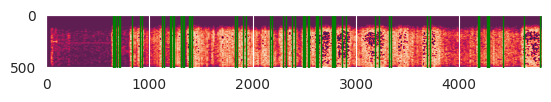

In [14]:
PlotImageWithBoxes(IMG,events)

Now let us create the annotation file

In [14]:
def AddAnnotations(res_file,Start,End,Height,annot_count,image_id):
    xmin = Start
    ymin = 0
    xmax = End
    ymax = Height
    w = End-Start
    h = Height
    area = w * h
    poly = [[xmin, ymin],
            [xmax, ymin],
            [xmax, ymax],
            [xmin, ymax]]

    annot_elem = {
        "id": annot_count,
        "bbox": [
            float(xmin),
            float(ymin),
            float(w),
            float(h)
        ],
        "segmentation": list([poly]),
        "image_id": image_id,
        "ignore": 0,
        "category_id": 0,
        "iscrowd": 0,
        "area": float(area)
    }
    res_file["annotations"].append(annot_elem)

In [15]:
def AddImage(res_file,img,events,annot_count, image_id,isTrain):

    if isTrain:
        path = f"/content/gdrive/MyDrive/coco/train/train_{image_id}.png"
    else:
        path = f"/content/gdrive/MyDrive/coco/eval/eval_{image_id}.png"

    img_w, img_h = img.size
    img_elem = {"file_name": f"{path}",
                "height": img_h,
                "width": img_w,
                "id": image_id}
    for elm in range(len(events)):
        AddAnnotations(res_file,float(events[elm,0]),float(events[elm,1]),img_h,annot_count,image_id)
        annot_count += 1
    res_file["images"].append(img_elem)
    return annot_count

In [18]:
def CreateAnnotationFile(dm):
    train_ds = dm.train
    eval_ds = dm.eval
    len_train = len(train_ds)
    len_eval = len(eval_ds)

    json_path = "/home/monty/Desktop/DL Project/DeepLearning_group_2/coco/annotations"

    categories = [
    {
        "supercategory": "none",
        "name": "movement",
        "id": 0
    }]

    res_file = {
        "categories": categories,
        "images": [],
        "annotations": []
    }
    annot_count = 0
    image_id = 0
    json_file = "instances_train2017.json"

    for x in range(len_train):
        spectrogram = train_ds.get_2Dmatrix(x, channel_idx=0, window_size=int(4.0 * train_ds.fs),
                                            step_size=int(0.125 * train_ds.fs), nfft=1024)
        img = spectogram_to_image(spectrogram)
        events = train_ds[x]['events']
        annot_count = AddImage(res_file,img,events,annot_count, image_id,True)
        image_id += 1
        #print("\tProcessed {}/{} images.".format(image_id,len_train))

    with open(os.path.join(json_path,json_file), "w") as f:
        json_str = json.dumps(res_file)
        f.write(json_str)

    print("Processed {} train images...".format(image_id))

    categories = [
    {
        "supercategory": "none",
        "name": "movement",
        "id": 0
    }]

    res_file = {
        "categories": categories,
        "images": [],
        "annotations": []
    }
    annot_count = 0
    image_id = 0
    json_file = "instances_val2017.json"

    for x in range(len_eval):
        spectrogram = eval_ds.get_2Dmatrix(x, channel_idx=0, window_size=int(4.0 * train_ds.fs),
                                            step_size=int(0.125 * train_ds.fs), nfft=1024)
        img = spectogram_to_image(spectrogram)
        events = train_ds[x]['events']
        annot_count = AddImage(res_file,img,events,annot_count, image_id,False)
        image_id += 1
        #print("\tProcessed {}/{} images.".format(image_id,len_eval))

    with open(os.path.join(json_path,json_file), "w") as f:
        json_str = json.dumps(res_file)
        f.write(json_str)
    print("Processed {} eval images...".format(image_id))

    print("Done.")

In [19]:
CreateAnnotationFile(dm)

Processed 700 train images...
Processed 280 eval images...
Done.
